OLS Estimation Using Artificial Data (Just understanding what OLS is capable of doing)

Graphics:
https://www.statsmodels.org/stable/graphics.html

Diagnostics:
https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html

OLS:
https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

GLS:
https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html


Example 1

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.graphics.plot_grids import scatter_ellipse
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

np.random.seed(9876789)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01010101e-01 1.02030405e-02]
 [1.00000000e+00 2.02020202e-01 4.08121620e-02]
 [1.00000000e+00 3.03030303e-01 9.18273646e-02]
 [1.00000000e+00 4.04040404e-01 1.63248648e-01]
 [1.00000000e+00 5.05050505e-01 2.55076013e-01]
 [1.00000000e+00 6.06060606e-01 3.67309458e-01]
 [1.00000000e+00 7.07070707e-01 4.99948985e-01]
 [1.00000000e+00 8.08080808e-01 6.52994592e-01]
 [1.00000000e+00 9.09090909e-01 8.26446281e-01]
 [1.00000000e+00 1.01010101e+00 1.02030405e+00]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00]
 [1.00000000e+00 1.21212121e+00 1.46923783e+00]
 [1.00000000e+00 1.31313131e+00 1.72431385e+00]
 [1.00000000e+00 1.41414141e+00 1.99979594e+00]
 [1.00000000e+00 1.51515152e+00 2.29568411e+00]
 [1.00000000e+00 1.61616162e+00 2.61197837e+00]
 [1.00000000e+00 1.71717172e+00 2.94867871e+00]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00]
 [1.00000000e+00 1.91919192e+00 3.68329762e+00]
 [1.00000000e+00 2.02020202e+00 4.081216

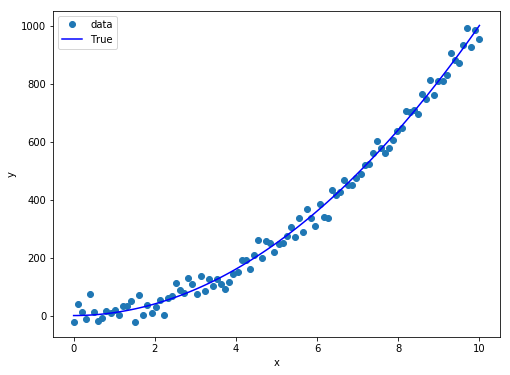

In [2]:
# Generate artificial data or load data using pd.read_csv

nsample = 100
x = np.linspace(0, 10, 100)        # Create artificial input
X = np.column_stack((x, x**2))     # Polynomial regression (Features are x and x^2)
beta = np.array([1, 0.1, 10])

X = sm.add_constant(X)   # Add intercept
y_true = np.dot(X, beta) # True output with no noise

sig = 25
e = sig*np.random.normal(size=nsample) # Add noise
y = np.dot(X, beta) + e  # Noisy observed output

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');
print(X)

In [3]:
# Model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6344.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          1.52e-103
Time:                        16:48:45   Log-Likelihood:                -468.40
No. Observations:                 100   AIC:                             942.8
Df Residuals:                      97   BIC:                             950.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5584      7.818      1.223      0.2

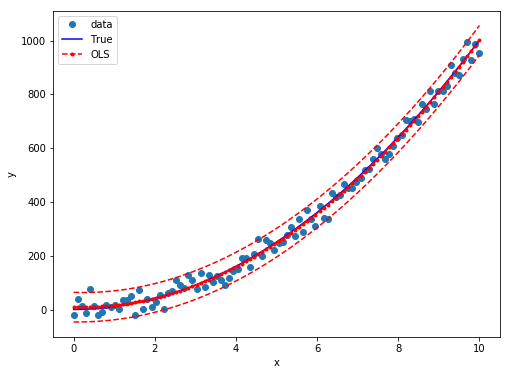

In [4]:
prstd, iv_l, iv_u = wls_prediction_std(results) # Confidence Intervals

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.270e+04
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          1.67e-105
Time:                        16:56:56   Log-Likelihood:                -468.86
No. Observations:                 100   AIC:                             941.7
Df Residuals:                      98   BIC:                             946.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2122      3.973      0.809      0.4

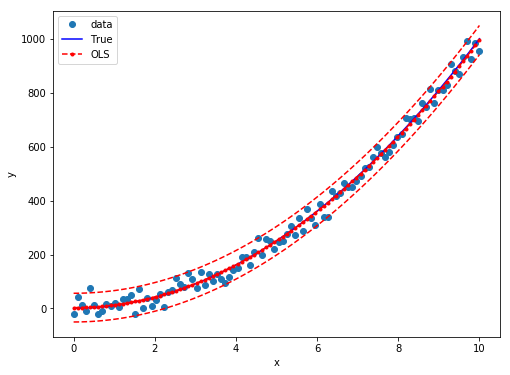

In [18]:
# Model
model = sm.OLS(y, X[:,[0,2]])
results = model.fit()
print(results.summary())

prstd, iv_l, iv_u = wls_prediction_std(results) # Confidence Intervals

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');

26.7049576960438


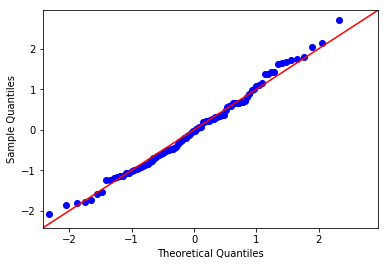

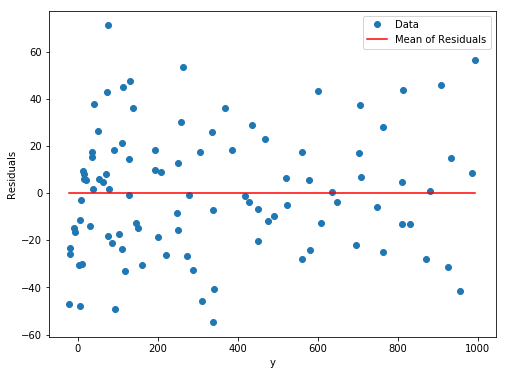

In [19]:
fig = sm.qqplot(results.resid, stats.t, fit=True, line="45")

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y, results.resid, 'o', label="Data")
ax.plot([np.min(y),np.max(y)],[np.mean(results.resid),np.mean(results.resid)], 'r',label='Mean of Residuals')
ax.set_xlabel('y')
ax.set_ylabel('Residuals')
legend = ax.legend(loc="best")
print(np.sqrt(np.sum(results.resid**2)/97))

#########################################################
##################### Example 2 ##########################
#########################################################

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  2.50000000e+01]
 [ 1.00000000e+00  4.08163265e-01  3.96924149e-01  2.10849646e+01]
 [ 1.00000000e+00  8.16326531e-01  7.28634783e-01  1.75031237e+01]
 [ 1.00000000e+00  1.22448980e+00  9.40632785e-01  1.42544773e+01]
 [ 1.00000000e+00  1.63265306e+00  9.98087482e-01  1.13390254e+01]
 [ 1.00000000e+00  2.04081633e+00  8.91559230e-01  8.75676801e+00]
 [ 1.00000000e+00  2.44897959e+00  6.38550320e-01  6.50770512e+00]
 [ 1.00000000e+00  2.85714286e+00  2.80629400e-01  4.59183673e+00]
 [ 1.00000000e+00  3.26530612e+00 -1.23398137e-01  3.00916285e+00]
 [ 1.00000000e+00  3.67346939e+00 -5.07151709e-01  1.75968347e+00]
 [ 1.00000000e+00  4.08163265e+00 -8.07581691e-01  8.43398584e-01]
 [ 1.00000000e+00  4.48979592e+00 -9.75328286e-01  2.60308205e-01]
 [ 1.00000000e+00  4.89795918e+00 -9.82831204e-01  1.04123282e-02]
 [ 1.00000000e+00  5.30612245e+00 -8.28857736e-01  9.37109538e-02]
 [ 1.00000000e+00  5.71428571e+00 -5.38705288e-01  5.10204082e

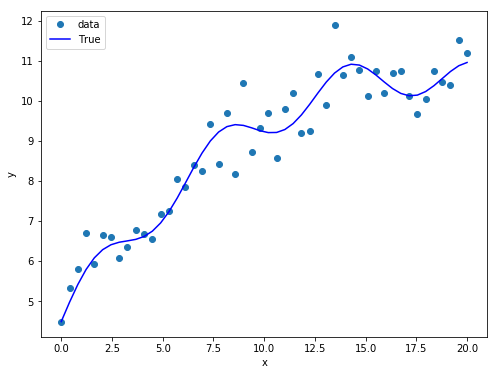

In [20]:
# Generate non-linear curve but linear in parameters
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2))
X = sm.add_constant(X)   # Add intercept
beta = [5, 0.5, 0.5, -0.02]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');
print(X)

In [21]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           6.30e-27
Time:                        16:58:08   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2058      0.171     30.405      0.0

In [22]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 5.20584496  0.46872448  0.48360119 -0.01740479]
Standard errors:  [0.17121765 0.02640602 0.10380518 0.00231847]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


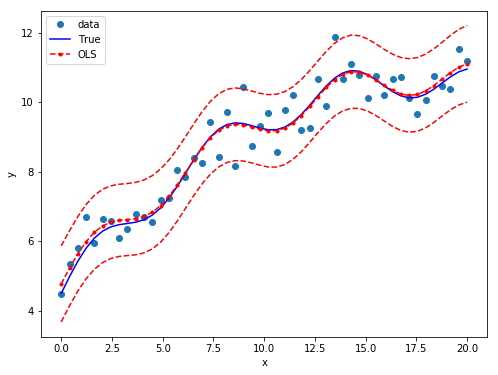

In [23]:
prstd, iv_l, iv_u = wls_prediction_std(res)   # Prediction/Confidence Intervals

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');

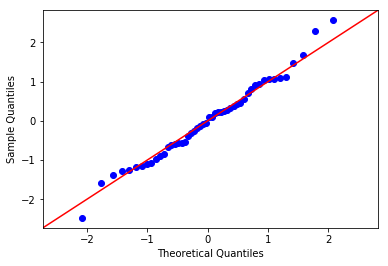

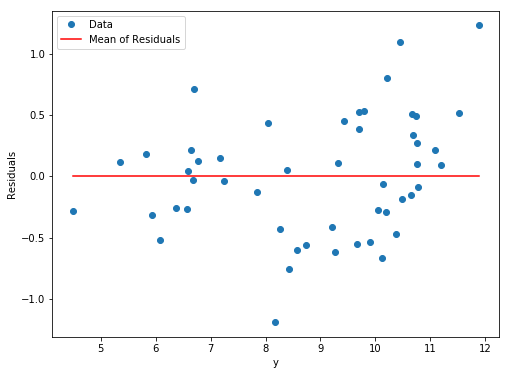

In [24]:
fig = sm.qqplot(res.resid, stats.t, fit=True, line="45")

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y, res.resid, 'o', label="Data")
ax.plot([np.min(y),np.max(y)],[np.mean(res.resid),np.mean(res.resid)], 'r',label='Mean of Residuals')
ax.set_xlabel('y')
ax.set_ylabel('Residuals')
legend = ax.legend(loc="best")

################################################################
##################### Example 3: Clustered Data #####################
################################################################

We generate some artificial data. There are 3 groups which will be modelled using dummy variables. Group 1 is the omitted/benchmark category.

Group 1: 0 0
Group 2: 1 0
Group 3: 0 1

[[ 1.          0.          0.          0.        ]
 [ 1.          0.40816327  0.          0.        ]
 [ 1.          0.81632653  0.          0.        ]
 [ 1.          1.2244898   0.          0.        ]
 [ 1.          1.63265306  0.          0.        ]
 [ 1.          2.04081633  0.          0.        ]
 [ 1.          2.44897959  0.          0.        ]
 [ 1.          2.85714286  0.          0.        ]
 [ 1.          3.26530612  0.          0.        ]
 [ 1.          3.67346939  0.          0.        ]
 [ 1.          4.08163265  0.          0.        ]
 [ 1.          4.48979592  0.          0.        ]
 [ 1.          4.89795918  0.          0.        ]
 [ 1.          5.30612245  0.          0.        ]
 [ 1.          5.71428571  0.          0.        ]
 [ 1.          6.12244898  0.          0.        ]
 [ 1.          6.53061224  0.          0.        ]
 [ 1.          6.93877551  0.          0.        ]
 [ 1.          7.34693878  0.          0.        ]
 [ 1.          7.75510204  0.  

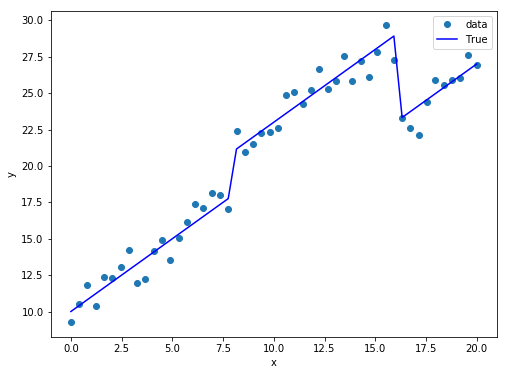

In [25]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X)   # Add intercept

beta = [10, 1., 3, -3]
y_true = np.dot(X, beta)
sig = 1
e = sig*np.random.normal(size=nsample)
y = y_true + e

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');
print(X)

In [26]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           5.69e-38
Time:                        17:03:28   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1031      0.310     32.573      0.0

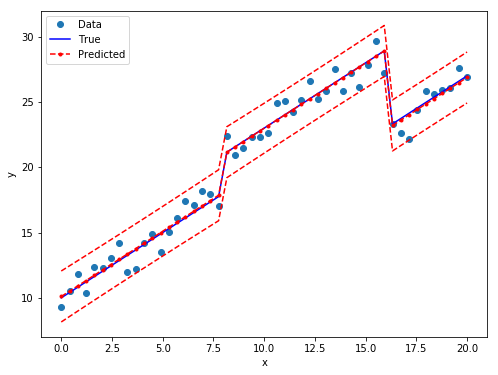

In [27]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.set_xlabel('x')
ax.set_ylabel('y')
legend = ax.legend(loc="best")

a + d
y = a+bx+c*group2+d*group3
            ( a: the level of y for group 1 when x = 0
              b: is the increase in the level of  y with every unit increase in x,
              c: is the increase in the base level of y for group 2 compared to group 1, 
              d: is the increase in the base level of y for group 3 compared to group 1) 

In [ ]:
fig = sm.qqplot(res2.resid, stats.t, fit=True, line="45")

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y, res2.resid, 'o', label="Data")
ax.plot([np.min(y),np.max(y)],[np.mean(res2.resid),np.mean(res2.resid)], 'r',label='Mean of Residuals')
ax.set_xlabel('y')
ax.set_ylabel('Residuals')
legend = ax.legend(loc="best")

######################################################
####################### Example 4 ######################
######################################################

Number of observations - 20,190
#
Number of variables - 10
#
Variable name definitions::

    mdvis   - Number of outpatient visits to an MD
    lncoins - ln(coinsurance + 1), 0 <= coninsurance <= 100
    idp     - 1 if individual deductible plan, 0 otherwise
    lpi     - ln(max(1, annual participation incentive payment))
    fmde    - 0 if idp = 1; ln(max(1, MDE/(0.01 coinsurance))) otherwise
    physlm  - 1 if the person has a physical limitation
    disea   - number of chronic diseases
    hlthg   - 1 if self-rated health is good
    hlthf   - 1 if self-rated health is fair
    hlthp   - 1 if self-rated health is poor
    (Omitted category is excellent self-rated health)

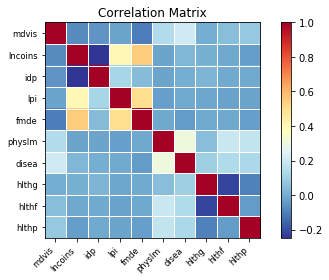

In [55]:
hie_data = sm.datasets.randhie.load_pandas()
corr_matrix = np.corrcoef(hie_data.data.T)
fig = sm.graphics.plot_corr(corr_matrix, xnames=hie_data.names)

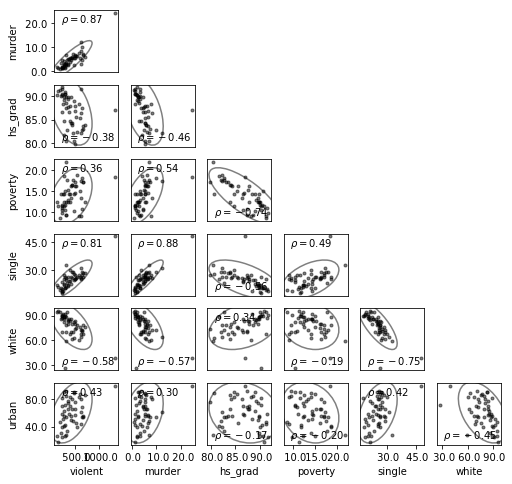

In [61]:
data = sm.datasets.statecrime.load_pandas().data
fig = plt.figure(figsize=(8,8))
scatter_ellipse(data, varnames=data.columns, fig=fig)
plt.show()

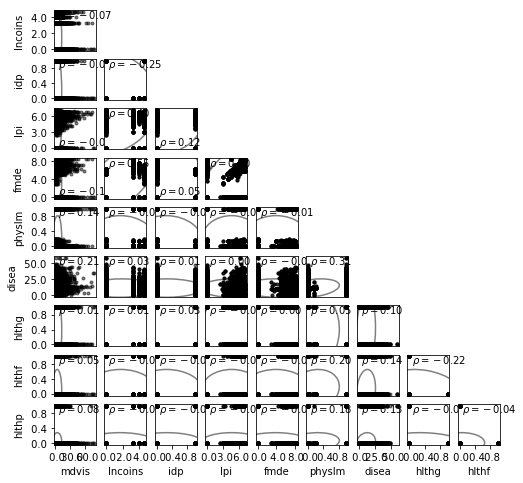

In [60]:
data = sm.datasets.randhie.load_pandas().data
fig = plt.figure(figsize=(8,8))
scatter_ellipse(data, varnames=data.columns, fig=fig)
plt.show()

########################################################
############ Example 5: Weighted Least-Squares #############
########################################################

WLS Estimation
####
Artificial data: Heteroscedasticity 2 groups
####
Model assumptions:
####
Misspecification: true model is quadratic, estimate only linear
####
Independent noise/error term
####
Two groups for error variance, low and high variance groups

[[ 1.          0.        ]
 [ 1.          0.40816327]
 [ 1.          0.81632653]
 [ 1.          1.2244898 ]
 [ 1.          1.63265306]
 [ 1.          2.04081633]
 [ 1.          2.44897959]
 [ 1.          2.85714286]
 [ 1.          3.26530612]
 [ 1.          3.67346939]
 [ 1.          4.08163265]
 [ 1.          4.48979592]
 [ 1.          4.89795918]
 [ 1.          5.30612245]
 [ 1.          5.71428571]
 [ 1.          6.12244898]
 [ 1.          6.53061224]
 [ 1.          6.93877551]
 [ 1.          7.34693878]
 [ 1.          7.75510204]
 [ 1.          8.16326531]
 [ 1.          8.57142857]
 [ 1.          8.97959184]
 [ 1.          9.3877551 ]
 [ 1.          9.79591837]
 [ 1.         10.20408163]
 [ 1.         10.6122449 ]
 [ 1.         11.02040816]
 [ 1.         11.42857143]
 [ 1.         11.83673469]
 [ 1.         12.24489796]
 [ 1.         12.65306122]
 [ 1.         13.06122449]
 [ 1.         13.46938776]
 [ 1.         13.87755102]
 [ 1.         14.28571429]
 [ 1.         14.69387755]
 

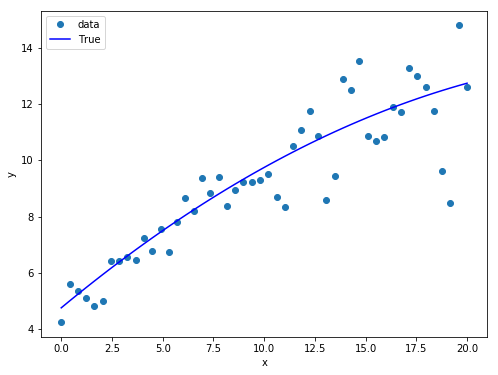

In [62]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x - 5)**2))
X = sm.add_constant(X)
beta = [5., 0.5, -0.01]
sig = 0.5
w = np.ones(nsample)
w[nsample * 6//10:] = 3
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
X = X[:,[0,1]]

fig, ax = plt.subplots(figsize=(8,6))         # Matplotlib

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best');
print(X)
print(w)

In [49]:
mod_wls = sm.WLS(y, X, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            WLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3123.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.41e-45
Time:                        17:26:42   Log-Likelihood:                -9.9267
No. Observations:                  50   AIC:                             23.85
Df Residuals:                      48   BIC:                             27.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1764      0.063     82.757      0.0

In [50]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.params)
print(res_wls.params)

[5.3702097  0.40471978]
[5.17641847 0.44202991]


In [51]:
se = np.vstack([[res_wls.bse], [res_ols.bse], [res_ols.HC0_se],
                [res_ols.HC1_se], [res_ols.HC2_se], [res_ols.HC3_se]])
se = np.round(se,4)
colnames = ['x1', 'const']
rownames = ['WLS', 'OLS', 'OLS_HC0', 'OLS_HC1', 'OLS_HC3', 'OLS_HC3']
tabl = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
print(tabl)

          x1   const 
---------------------
WLS     0.0625 0.0079
OLS     0.0868 0.0075
OLS_HC0 0.0932 0.0089
OLS_HC1 0.0951 0.009 
OLS_HC3 0.0964 0.0092
OLS_HC3 0.0997 0.0095
---------------------


In [52]:
covb = res_ols.cov_params()
prediction_var = res_ols.mse_resid + (X * np.dot(covb,X.T).T).sum(1)
prediction_std = np.sqrt(prediction_var)
tppf = stats.t.ppf(0.975, res_ols.df_resid)

prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(res_ols)


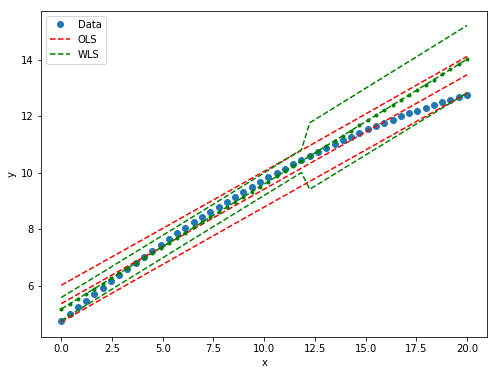

In [53]:
prstd, iv_l_wls, iv_u_wls = wls_prediction_std(res_wls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_true, 'o', label="Data")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="OLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_wls.fittedvalues, 'g--.')
ax.plot(x, iv_u_wls, 'g--', label="WLS")
ax.plot(x, iv_l_wls, 'g--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="best");

In [54]:
resid1 = res_ols.resid[w==1.]

var1 = resid1.var(ddof=int(res_ols.df_model)+1)

resid2 = res_ols.resid[w!=1.]

var2 = resid2.var(ddof=int(res_ols.df_model)+1)

w_est = w.copy()
w_est[w!=1.] = np.sqrt(var2) / np.sqrt(var1)

print(w_est)
res_fwls = sm.WLS(y, X, 1./((w_est ** 2))).fit()
print(res_fwls.summary())

[1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.1367275 1.1367275 1.1367275 1.1367275 1.1367275
 1.1367275 1.1367275 1.1367275 1.1367275 1.1367275 1.1367275 1.1367275
 1.1367275 1.1367275 1.1367275 1.1367275 1.1367275 1.1367275 1.1367275
 1.1367275]
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            WLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2928.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.11e-44
Time:                        17:26:45   Log-Likelihood:                -11.292
No. Observations:                  50   AIC: 

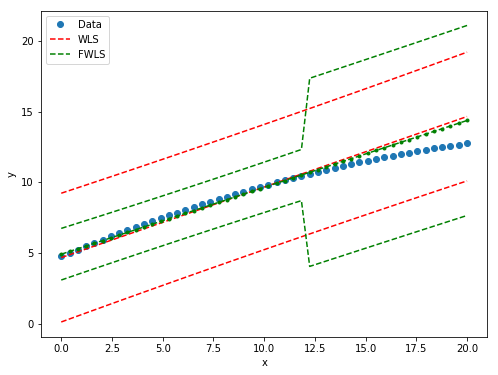

In [47]:
prstd, iv_l_fwls, iv_u_fwls = wls_prediction_std(res_fwls)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_true, 'o', label="Data")
# OLS
ax.plot(x, res_ols.fittedvalues, 'r--')
ax.plot(x, iv_u_ols, 'r--', label="WLS")
ax.plot(x, iv_l_ols, 'r--')
# WLS
ax.plot(x, res_fwls.fittedvalues, 'g--.')
ax.plot(x, iv_u_fwls, 'g--', label="FWLS")
ax.plot(x, iv_l_fwls, 'g--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc="best");

In [ ]:
The Green prediction strategy:
    Step 1: OLS for the first 30 points 
    Step 2: Calculate Sigma_1^2
    Step 3: OLS for the second 30 points
    Step 4: Calculate Sigma_2^2
    Step 5: Define the structure of \SIGMA => Var(e) = sigma^2*SIGMA